# PRÁCTICO N° 3 : Bases de Datos #
## Tapia Martina ##
## Actividad 4 ##

En esta actividad lo que se busca es calcular la magnitud absoluta para cada galaxia, usando la aproximación:  

$$ M = m - 25- 5* log_{10}(\frac{c*z}{H}) $$ 


donde   
- c es la velocidad de la luz y;
- $ H = 75 \frac{km}{s*M_{pc}}$  

Además, se quiere graficar la magnitud absoluta vs. el redshift para todas las galaxias con $m_{r} < 17.5 $ y obtener un ajuste para la envolvente de los puntos. 

In [31]:
#Primero se importan las librerías necesarias para trabajar
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns          
sns.set()         
import scipy.stats 

In [17]:
data = np.genfromtxt('muestra1_MartinaTapia.csv',delimiter=',', skip_header = 1)

In [18]:
# Constantes

c = 300000
H = 75

In [19]:
# Magnitudes aparentes r (todas las galaxias)

mr = data[:, 4]
z = data[:, 6] 

In [20]:
# Calculo de Magnitudes Absolutas

def MagAbs():
    M = []
    z2 =[]
    for i in range(len(mr)):
        if (mr[i]<17.5):
            if (z[i]>=0):
                z2.append(z[i])
                M1 = mr[i] - 25 - 5 * math.log10 ((c * z[i])/ H)
                M.append(M1)
        else:
            None
    return(M,z2)
    
            

In [21]:
Mag, z = MagAbs()

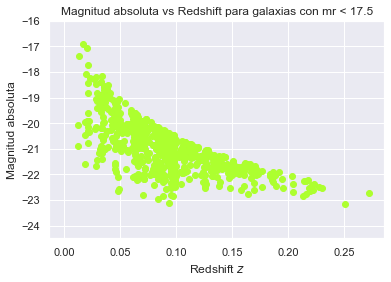

In [119]:
# Se grafican las magnitudes absolutas vs el redshift

plt.title('Magnitud absoluta vs Redshift para galaxias con mr < 17.5')
plt.xlabel('Redshift $z$')
plt.ylabel('Magnitud absoluta')
plt.ylim(-24.5,-16)
plt.scatter(z,Mag, color = 'greenyellow')
plt.show()

Ahora se quiere obtener el ajuste de la envolvente de los puntos y para eso, se tienen que conocer cuáles serian los valores máximos de magnitud absoluta en un determinado intervalo de z. Para poder averiguar éstos valores máximos se usa la función binned_statistic de scipy.stats. 

In [100]:
# Los valores de magnitud máximos 
mag = scipy.stats.binned_statistic(z,Mag,statistic='max',bins=100)[0] 

In [101]:
#Los valores de redshift correspondientes a los máximos de magnitud
z2 = scipy.stats.binned_statistic(z,Mag,statistic='max',bins=100)[1]

In [124]:
# se define una función que ajuste el modelo de magnitudes con los valores máximos encontrados

def ajuste(b = 17.5):
    a = []
    a1 = 0
    for i in range(len(z2)):       
            a1 = b -25-5 * math.log10 ((c * z2[i])/ H) 
            a.append(a1)
    return(a)

In [146]:
#Se ejecuta la fucnión para diferentes valores de b 
y = ajuste(b = 17.5)
y1 = ajuste(b=17.3)
y2 =ajuste(b=17.7)

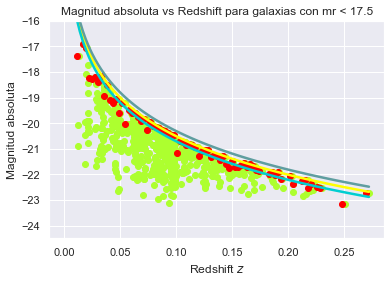

In [145]:
# Se grafican las magnitudes absolutas vs el redshift con el ajuste realizado

plt.title('Magnitud absoluta vs Redshift para galaxias con mr < 17.5')
plt.xlabel('Redshift $z$')
plt.ylabel('Magnitud absoluta')
plt.ylim(-24.5,-16)
plt.scatter(z,Mag, color = 'greenyellow')
plt.scatter(z2[0:100],mag,color= 'red', label = 'máximos')
plt.plot(z2, y, label = 'Ajuste', color = 'yellow', linewidth=2.5)
plt.plot(z2, y1, label='Ajuste1',color = 'darkturquoise', linewidth=2.5)
plt.plot(z2, y2,label = 'Ajuste2',color = 'cadetblue', linewidth=2.5)
plt.show()

Se puede notar del gráfico anterior que al variar el valor de b, el ajuste cambia. Se graficaron 3 posibles valores, inspirados en conocimientos previos, se puede ver que el mejor ajuste es el amarillo, con b = 17.5. Notar que éste valor es el límite usado para determinar el rango de magnitudes aparentes a utilizar.